# Problem 1:
## Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables


In [989]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')


import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [990]:
# Import data

df=pd.read_excel("C:/Users/user/Desktop/PGDSBA/Machine Learning 2/Election_Data (1).xlsx")

In [991]:
# Perform EDA

df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [992]:
df.shape

(1525, 10)

In [993]:
df.drop('Unnamed: 0', axis=1, inplace  = True )

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [995]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [996]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [997]:
# min age is 24 avaerage age of voter is 54 and maximum age is 93

In [998]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
vote
Conservative     462
Labour          1063
Name: count, dtype: int64


GENDER :  2
gender
male      713
female    812
Name: count, dtype: int64




In [999]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

AGE :  70
age
91     1
93     1
90     1
92     2
87     3
      ..
54    37
47    38
35    39
49    39
37    42
Name: count, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
economic.cond.national
1     37
5     82
2    257
4    542
3    607
Name: count, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
economic.cond.household
1     65
5     92
2    280
4    440
3    648
Name: count, dtype: int64


BLAIR :  5
Blair
3      1
1     97
5    153
2    438
4    836
Name: count, dtype: int64


HAGUE :  5
Hague
3     37
5     73
1    233
4    558
2    624
Name: count, dtype: int64


EUROPE :  11
Europe
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: count, dtype: int64


POLITICAL.KNOWLEDGE :  4
political.knowledge
1     38
3    250
0    455
2    782
Name: count, dtype: int64




In [1000]:
df.duplicated().sum()

8

In [1001]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

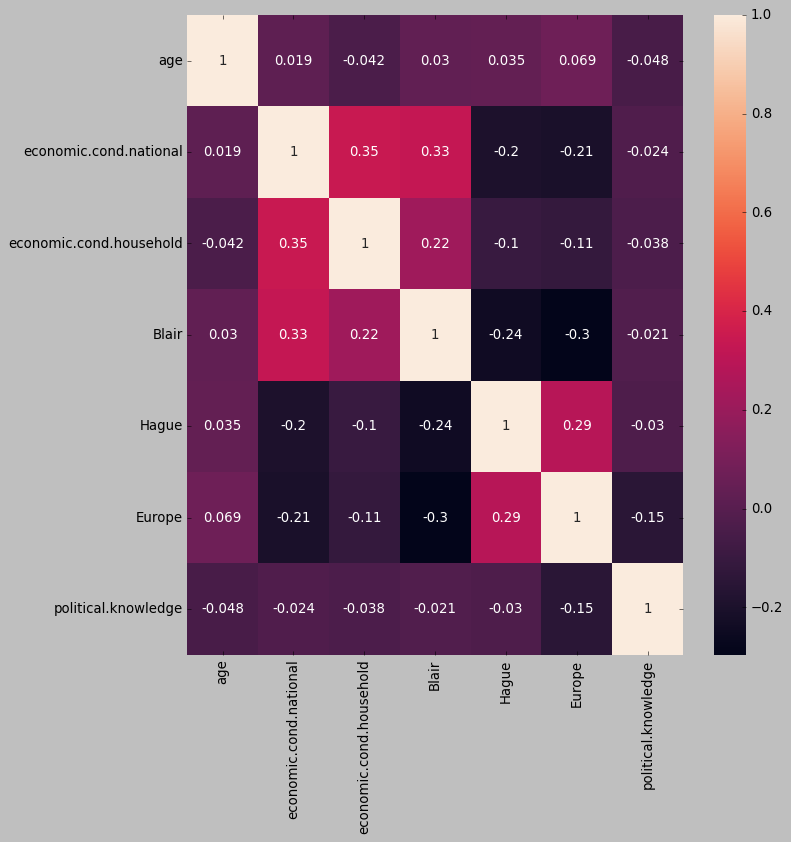

In [1002]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [1003]:
df_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

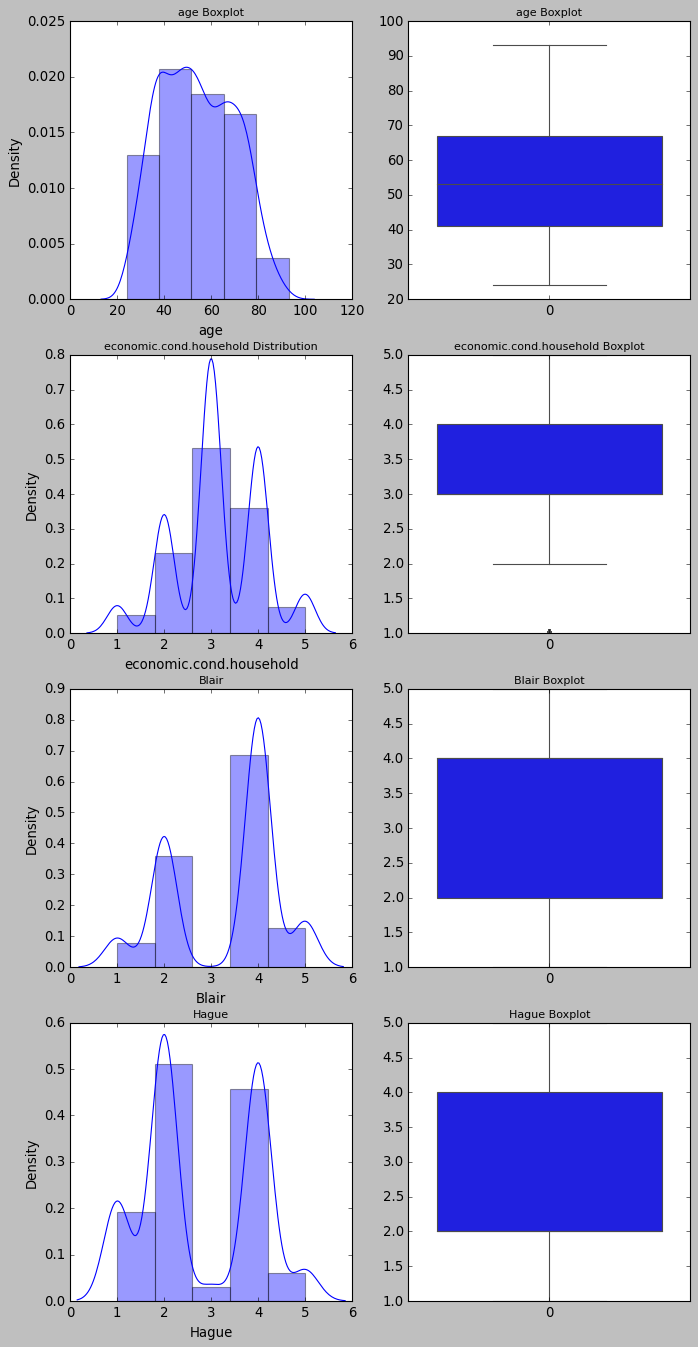

In [1004]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0],bins=5)
a.set_title("age Boxplot",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.household'] ,bins=5, ax=axes[1][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] ,bins=5, ax=axes[2][0])
a.set_title("Blair",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[2][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(df['Hague'] ,bins=5, ax=axes[3][0])
a.set_title("Hague",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[3][1])
a.set_title("Hague Boxplot",fontsize=10)

plt.show()


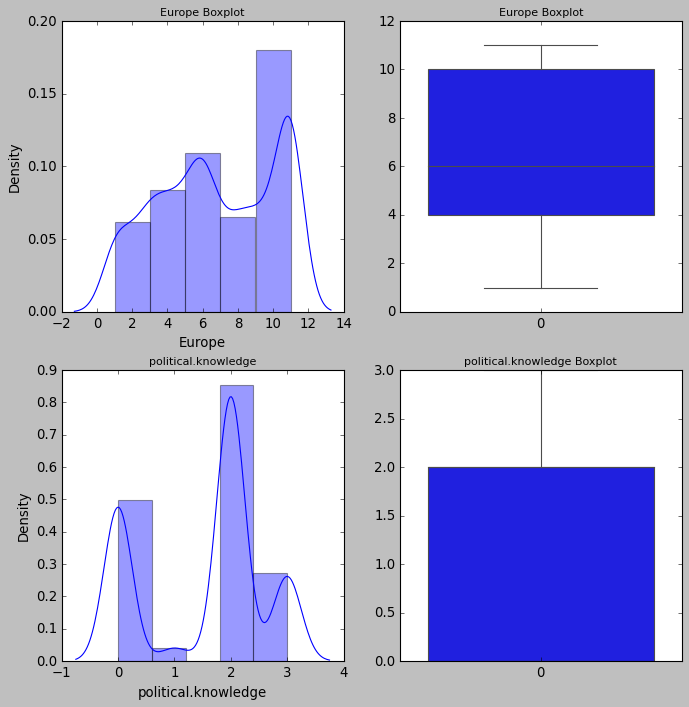

In [1005]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
a = sns.distplot(df['Europe'] , ax=axes[0][0],bins=5)
a.set_title("Europe Boxplot",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[0][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] ,bins=5, ax=axes[1][0])
a.set_title("political.knowledge",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[1][1])
a.set_title("political.knowledge Boxplot",fontsize=10)




plt.show()

In [1006]:
df_cat

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male
...,...,...
1520,Conservative,male
1521,Conservative,male
1522,Labour,male
1523,Conservative,male


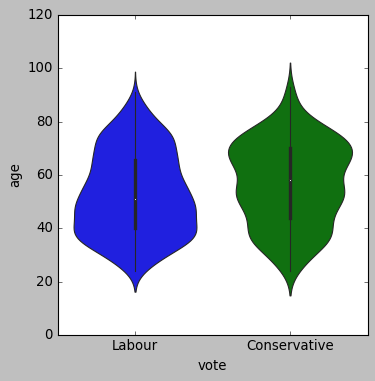

In [1007]:
#Bivariate and Mutivariate analysis

plt.figure(figsize=(5,5))

ax=sns.violinplot(x =df['vote'], y=df['age'])     
     
# visualizing the plot
plt.show()

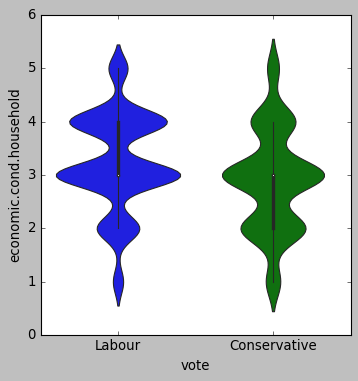

In [1008]:
plt.figure(figsize=(5,5))

ax=sns.violinplot(x =df['vote'], y=df['economic.cond.household'])     
     
# visualizing the plot
plt.show()

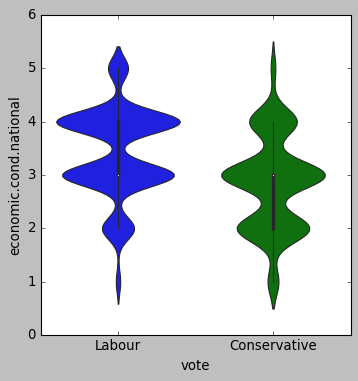

In [1009]:
plt.figure(figsize=(5,5))

ax=sns.violinplot(x =df['vote'], y=df['economic.cond.national'])     
     
# visualizing the plot
plt.show()


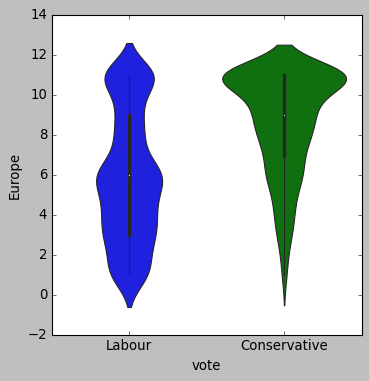

In [1010]:
plt.figure(figsize=(5,5))

ax=sns.violinplot(x =df['vote'], y=df['Europe'])     
     
# visualizing the plot
plt.show()

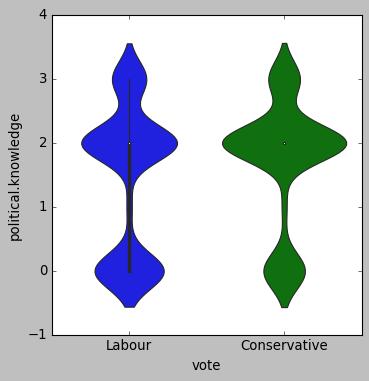

In [1011]:
plt.figure(figsize=(5,5))

ax=sns.violinplot(x =df['vote'], y=df['political.knowledge'])     
     
# visualizing the plot
plt.show()

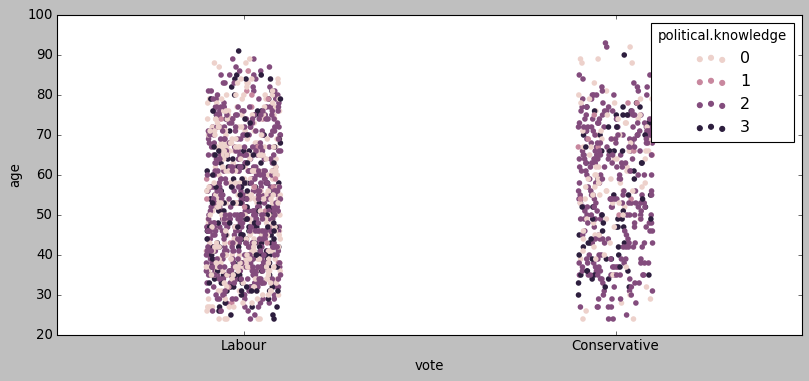

In [1012]:
plt.figure(figsize=(12,5))
sns.stripplot(x=df["vote"], y=df['age'],hue=df['political.knowledge']) 
plt.show()

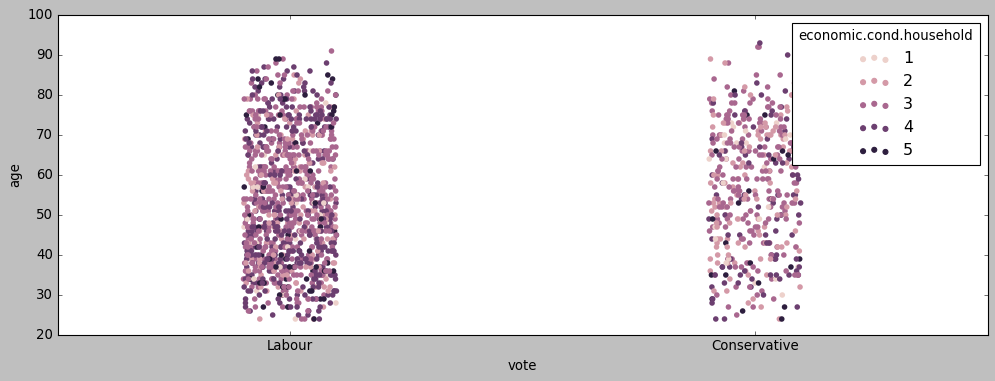

In [1013]:
plt.figure(figsize=(15,5))
sns.stripplot(x=df["vote"], y=df['age'],hue=df['economic.cond.household']) 
plt.show()

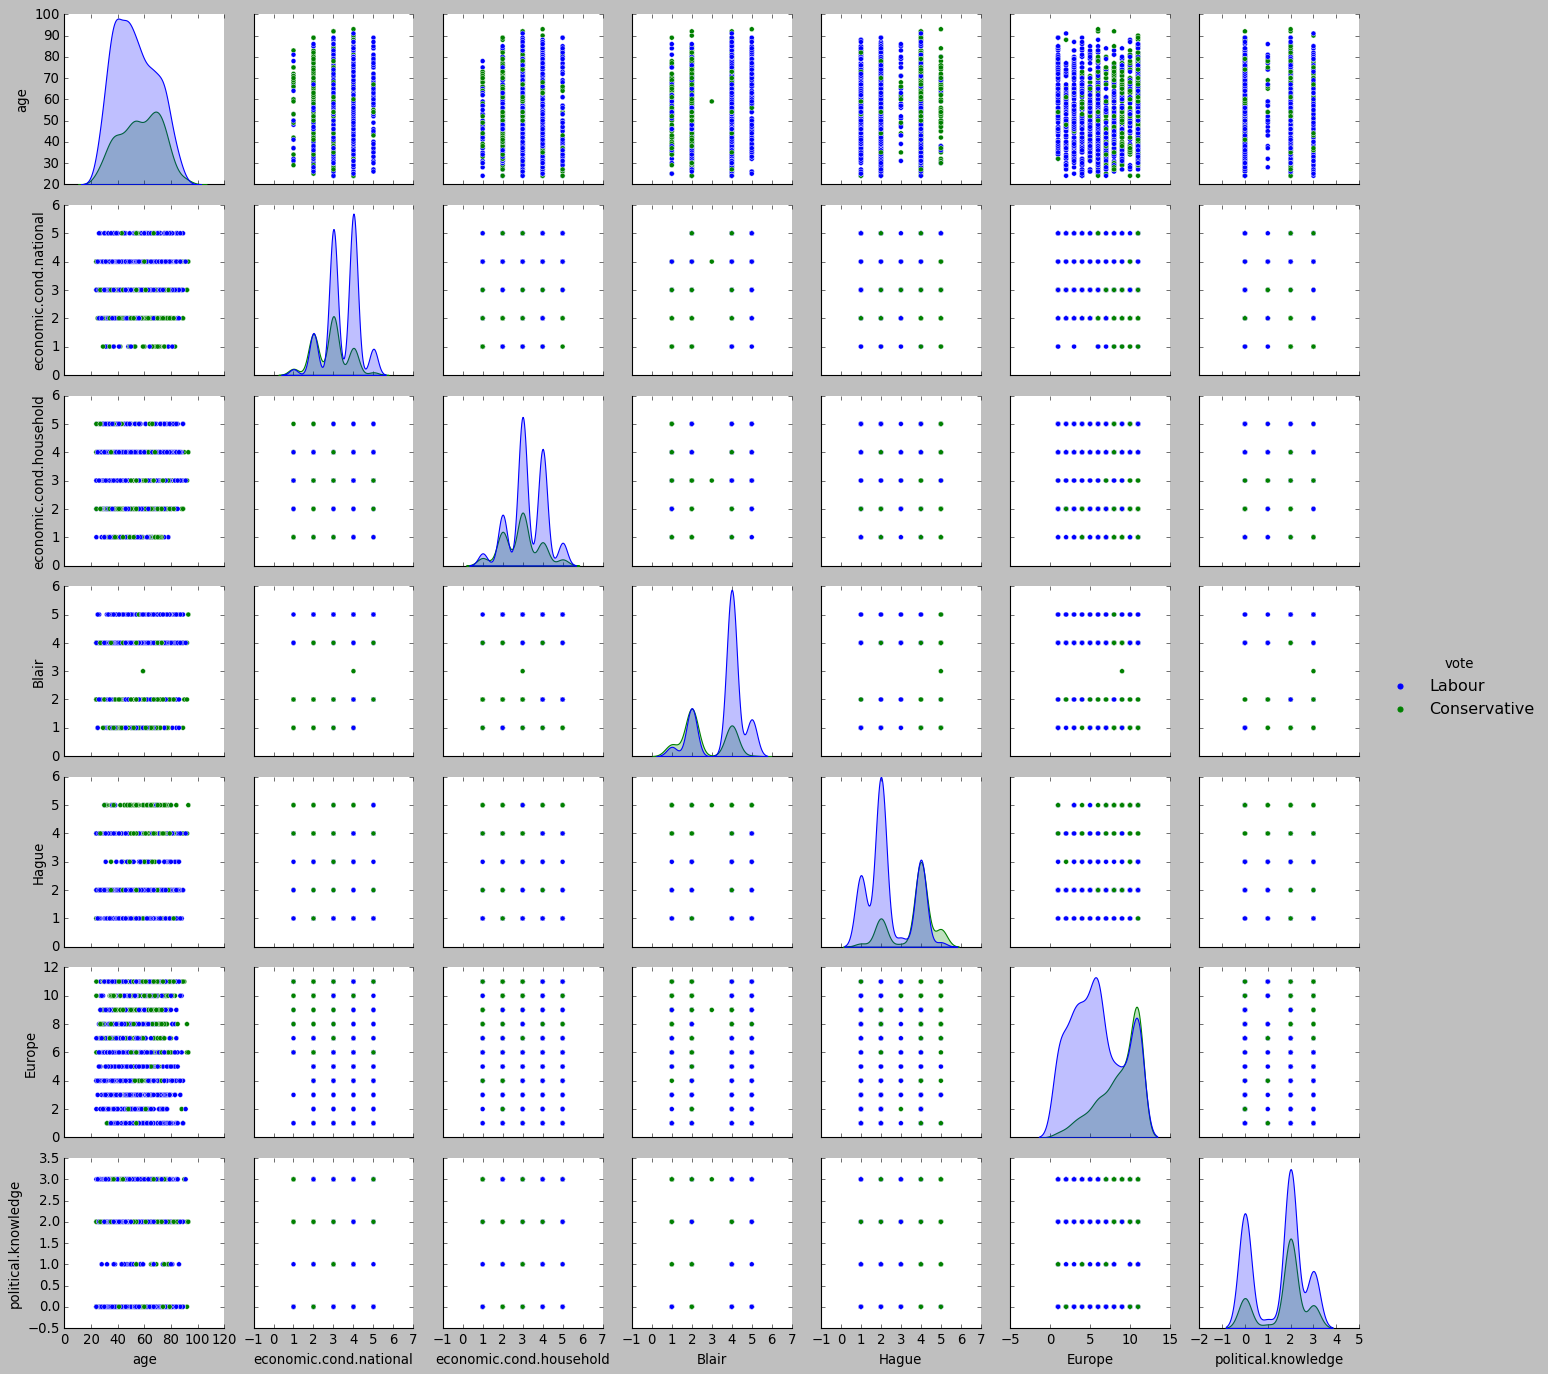

In [1014]:
sns.pairplot(df,hue="vote")

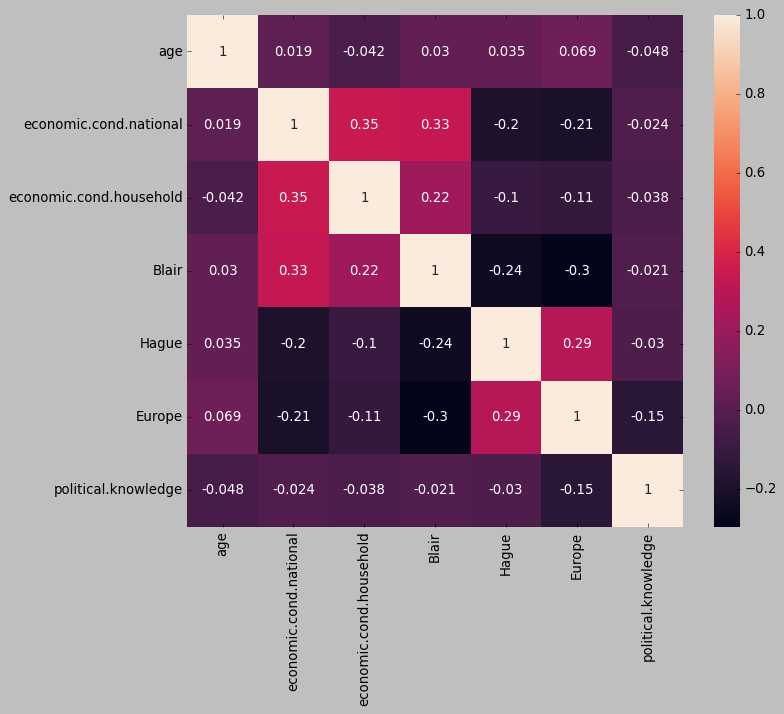

In [1015]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [1016]:
# Get dummies of categorical variables
cat = df_cat.columns
cat

Index(['vote', 'gender'], dtype='object')

In [1017]:
df =pd.get_dummies(df, columns=cat,drop_first=True)
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,True,False
1,36,4,4,4,4,5,2,True,True
2,35,4,4,5,2,3,2,True,True
3,24,4,2,2,1,4,0,True,False
4,41,2,2,1,1,6,2,True,True


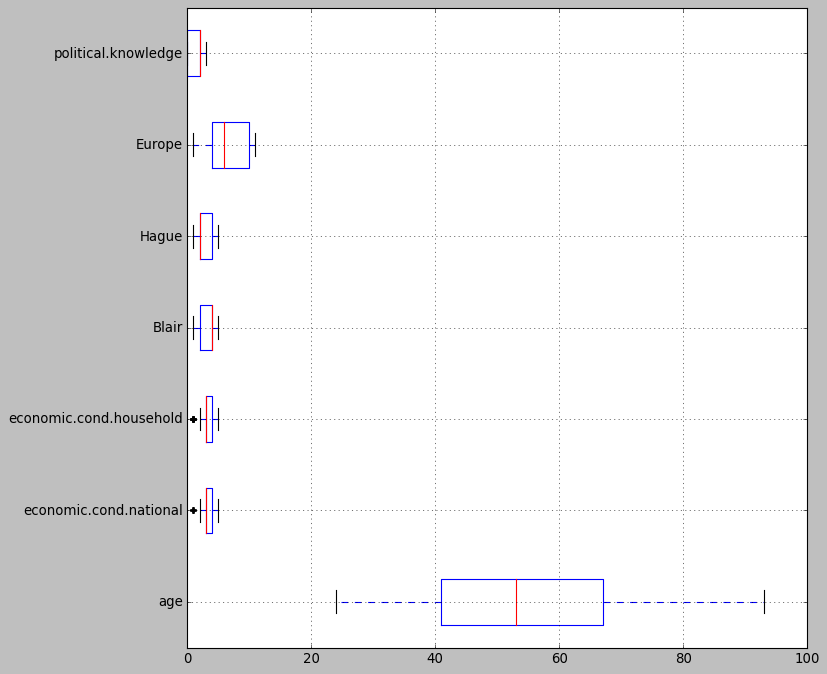

In [1018]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

In [1019]:
# scaling the variables using min-max here only
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [1020]:
df.columns


Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [1021]:
num1 =['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge']

In [1022]:
# scaling the variables using min-max here only

df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [1023]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,True,False
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,True,True
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,True,True
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,True,False
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,True,True


In [1024]:
#after scaling the variables we will create test - train split
# Copy all the predictor variables into X dataframe
X = df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = df['vote_Labour']

In [1025]:
X

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,False
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,True
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,True
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,False
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,True
...,...,...,...,...,...,...,...,...
1520,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,True
1521,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,True
1522,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,True
1523,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,True


In [1026]:
# Splait the data into test and train set

# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Model Building
- Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting)

### Naive Bayes

In [1027]:
#Apply Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [1028]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [1029]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

       False       0.74      0.72      0.73       332
        True       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



Here accuracy is for Naive Gaussian Bayes train set is 83% and recall for True is .88 but for false it is .77. Out 

In [1030]:
y_test.value_counts()

vote_Labour
True     328
False    130
Name: count, dtype: int64

In [1031]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

       False       0.68      0.72      0.70       130
        True       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



Here accuracy is for Naive Gaussian Bayes train set is 83% and recall for True is .88 but for false it is .77. 

Here accuracy is for Naive Gaussian Bayes test set is 83% and recall for True is .87 but for false it is .72. 

AUC: 0.885


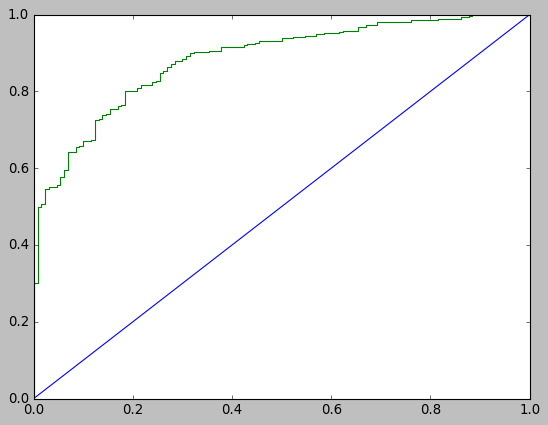

In [1032]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay



# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC for the Test Data: 0.885


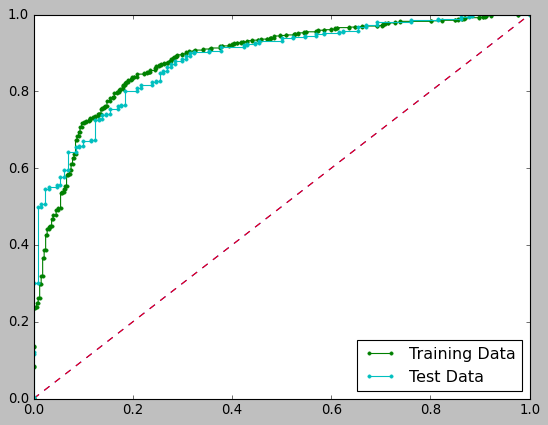

In [1033]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


### AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Which factor is most relevant for the test?

The most important Model Evaluation metric here is Accuracy. A
Accuracy represents the proportion of correctly classified cases out of the total number of instances in the dataset3. To calculate accuracy, you divide the number of correct predictions by the total number of predictions made by the model.


In a binary classification scenario:

True Positives (TP) are instances correctly predicted as positive.

True Negatives (TN) are instances correctly predicted as negative.

False Positives (FP) are instances incorrectly predicted as positive.

False Negatives (FN) are instances incorrectly predicted as negative.
Reason:



Our main goal here is to increase the accuracy.
Our secondary objective is to increase the recall as well.


The given text appears to be the output of a classification model evaluation, possibly from a machine learning algorithm. The first line "0.8253275109170306" seems to be the accuracy score of the model. The numbers in the middle "[[ 94  36] [ 44 284]]" are likely the confusion matrix, showing the counts of true positive, false positive, false negative, and true negative predictions. The table below that provides precision, recall, f1-score, and support for each class (False and True), as well as some aggregated metrics (accuracy, macro avg, weighted avg). This output is commonly produced when evaluating the performance of a binary classification model.

This is a classification report showing the performance metrics of a machine learning model. Here is what each term means:

- Precision: Out of all the positive predictions made by the model, how many were actually correct. It is calculated as True Positives / (True Positives + False Positives).
- Recall: Out of all the actual positive instances, how many were correctly predicted by the model. It is calculated as True Positives / (True Positives + False Negatives).
- F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. It is calculated as 2 * (Precision * Recall) / (Precision + Recall).
- Support: The number of actual occurrences of the class in the dataset.

In this specific classification report:
- For the "False" class:
  - Precision is 0.68, Recall is 0.72, and F1-score is 0.70.
  - Out of 130 instances, the model predicted 93 as False correctly (True Negatives).
- For the "True" class:
  - Precision is 0.89, Recall is 0.87, and F1-score is 0.88.
  - Out of 328 instances, the model predicted 285 as True correctly (True Positives).

The accuracy of the model is 0.83, which means that it correctly predicted 83% of the instances in the dataset.

The macro avg is the average of precision, recall, and F1-score across all classes, giving equal weight to each class.

The weighted avg is the weighted average of precision, recall, and F1-score, where each metric is weighted by the number of true instances for each class.

## Logistic Regression (Not req. for project just for fun)

In [1034]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [1035]:
## Performance Matrix on train data set
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.837863167760075
[[226 106]
 [ 67 668]]
              precision    recall  f1-score   support

       False       0.77      0.68      0.72       332
        True       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [1036]:
## Performance Matrix on test data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 84  46]
 [ 36 292]]
              precision    recall  f1-score   support

       False       0.70      0.65      0.67       130
        True       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [1037]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='l2',verbose=True,n_jobs=2)
model.fit(X_train, y_train)


#Predicting on training and test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)


# Getting the predicted classes and probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.4s finished


,0,1
0,0.915052,0.084948
1,0.670164,0.329836
2,0.333236,0.666764
3,0.469974,0.530026
4,0.176881,0.823119


AUC: 0.883


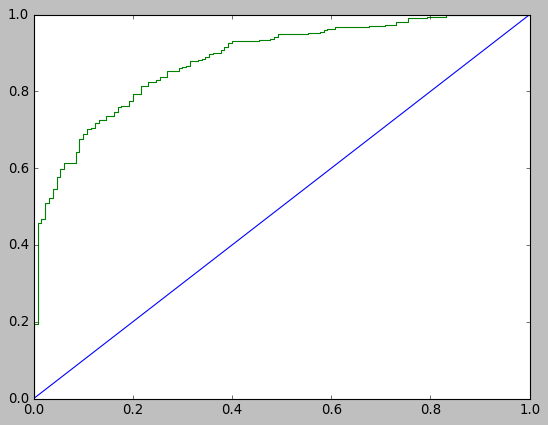

In [1038]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay



# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [1039]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8209606986899564

## Ada Boost

In [1040]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [1041]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

       False       0.78      0.72      0.74       332
        True       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [1042]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

       False       0.68      0.69      0.68       130
        True       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.879


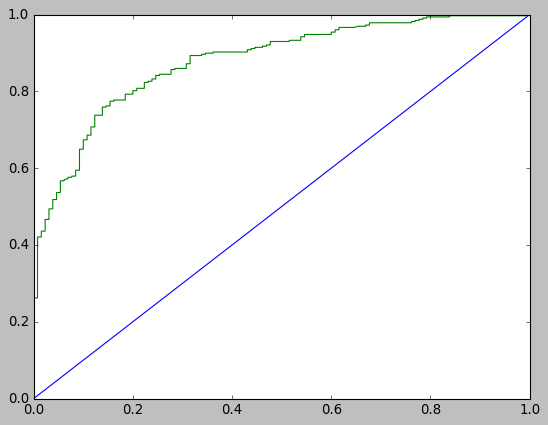

In [1043]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Gradient boosting


In [1044]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [1045]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

       False       0.84      0.79      0.81       332
        True       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [1046]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

       False       0.69      0.74      0.71       130
        True       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



AUC for the Train Data: 0.950
AUC for the Test Data: 0.904


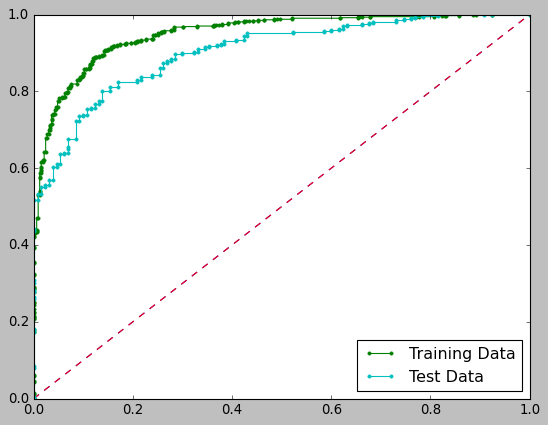

In [1047]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for the Train Data: %.3f' % auc)
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


### AUC and ROC for the test data
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## KNN Model

In [1083]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1084]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))



0.8650421743205249
[[251  81]
 [ 63 672]]
              precision    recall  f1-score   support

       False       0.80      0.76      0.78       332
        True       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067



<Axes: >

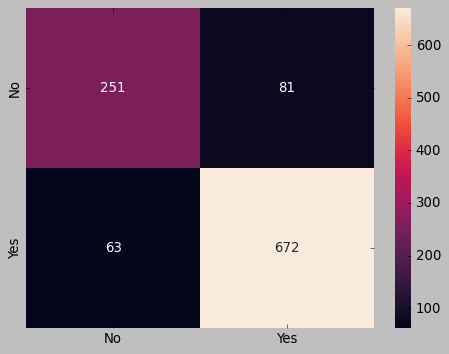

In [1085]:
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<Axes: >

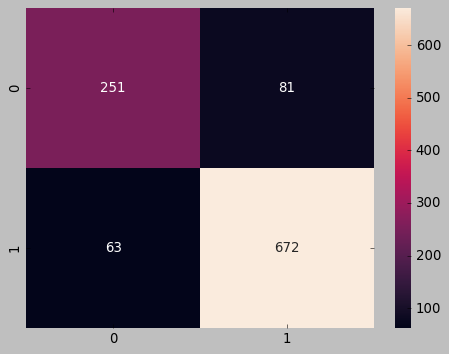

In [1086]:
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1051]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 95  35]
 [ 46 282]]
              precision    recall  f1-score   support

       False       0.67      0.73      0.70       130
        True       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.83       458



<Axes: >

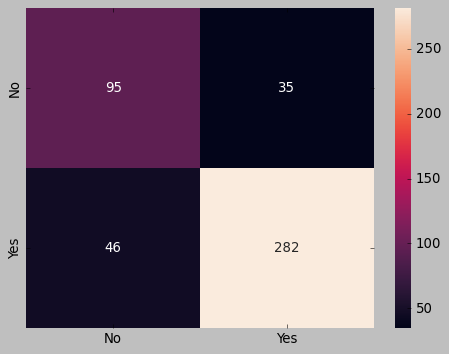

In [1052]:
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.864


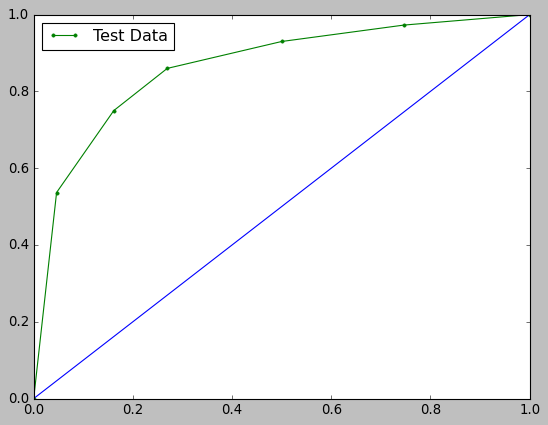

In [1053]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='-',)
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.', label='Test Data');


plt.legend(loc='best')

AUC for the Test Data: 0.864


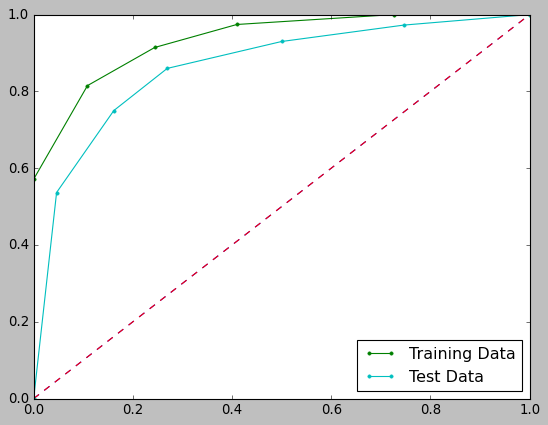

In [1054]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


### AUC and ROC for the test data
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Decision Tree (not req. for project)

In [1055]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [1056]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       332
        True       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [1057]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7620087336244541
[[ 86  44]
 [ 65 263]]
              precision    recall  f1-score   support

       False       0.57      0.66      0.61       130
        True       0.86      0.80      0.83       328

    accuracy                           0.76       458
   macro avg       0.71      0.73      0.72       458
weighted avg       0.78      0.76      0.77       458



AUC for the Test Data: 0.732


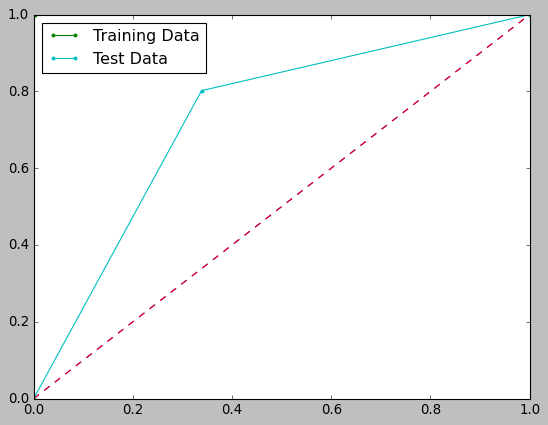

In [1058]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


### AUC and ROC for the test data
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



## Random Forrest (not req. for project)

In [1059]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [1060]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       332
        True       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [1061]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

       False       0.68      0.69      0.69       130
        True       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC for the Test Data: 0.888


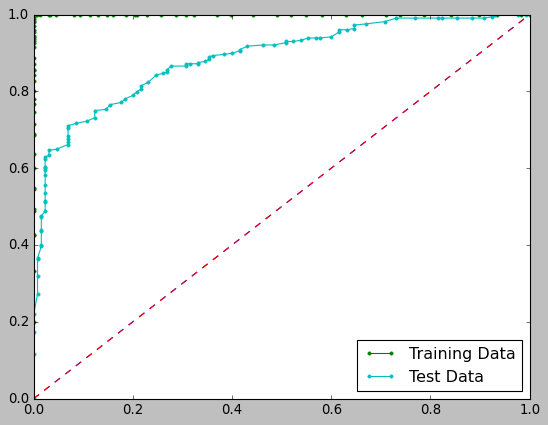

In [1062]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


### AUC and ROC for the test data
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Bagging

In [1063]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [1064]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       332
        True       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



<Axes: >

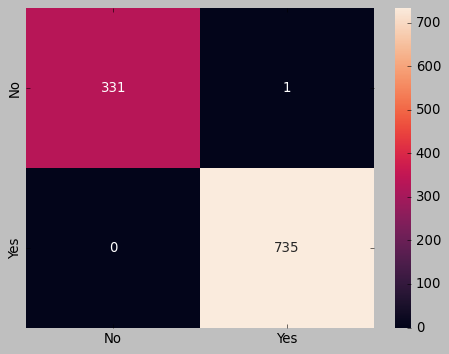

In [1065]:
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1066]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[ 84  46]
 [ 46 282]]
              precision    recall  f1-score   support

       False       0.65      0.65      0.65       130
        True       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



<Axes: >

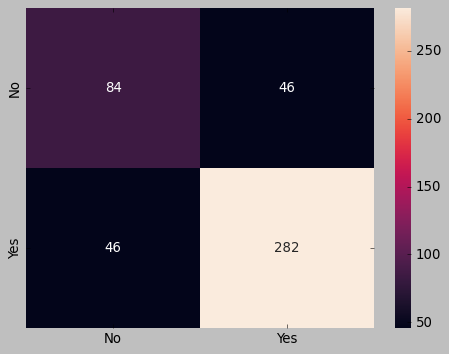

In [1067]:
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC for the Test Data: 0.878


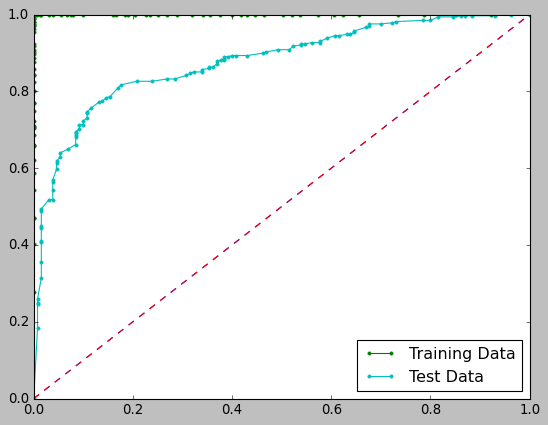

In [1068]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


### AUC and ROC for the test data
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Q.Model Performance improvement

- Improve the model performance of bagging and boosting models by tuning the model - Comment on the model performance improvement on training and test data


0.7991266375545851


<Axes: >

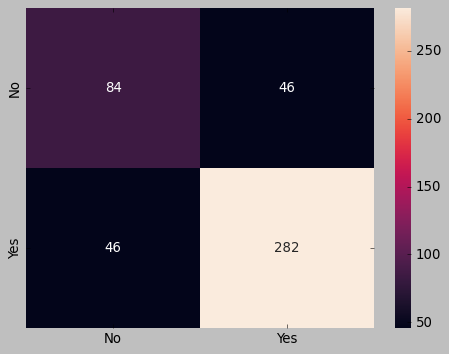

In [1069]:
# BAGGING Improvement

cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)


y_predict = Bagging_model.predict(X_test)

print(Bagging_model.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1070]:
df_cm

,No,Yes
No,84,46
Yes,46,282


In [1071]:


from sklearn.ensemble import BaggingClassifier


bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1.0],
          'n_estimators': [2, 5, 10, 20],
}


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=3, verbose=1)





In [1072]:
bc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [3, 5, 10, 20],
                         'base_estimator__max_features': [None, 'auto'],
                         'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10],
                         'bootstrap_features': [False, True],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             verbose=1)

In [1073]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [1074]:
best_params

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [1075]:
best_model

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

In [1076]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score =best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8528584817244611
[[222 110]
 [ 47 688]]
              precision    recall  f1-score   support

       False       0.83      0.67      0.74       332
        True       0.86      0.94      0.90       735

    accuracy                           0.85      1067
   macro avg       0.84      0.80      0.82      1067
weighted avg       0.85      0.85      0.85      1067



<Axes: >

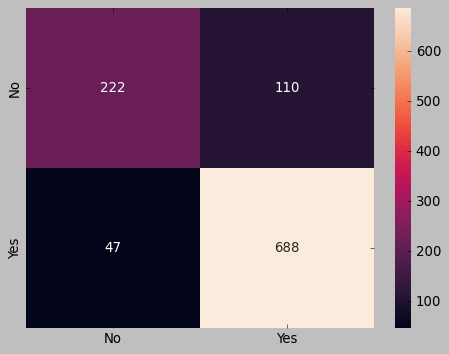

In [1077]:
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1078]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = bc_gs.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 83  47]
 [ 30 298]]
              precision    recall  f1-score   support

       False       0.73      0.64      0.68       130
        True       0.86      0.91      0.89       328

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.78       458
weighted avg       0.83      0.83      0.83       458



<Axes: >

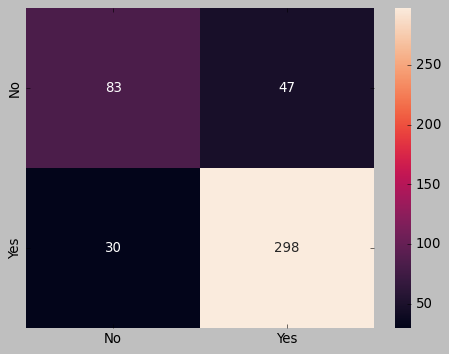

In [1079]:
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC for the Train Data: 0.917
AUC for the Test Data: 0.902


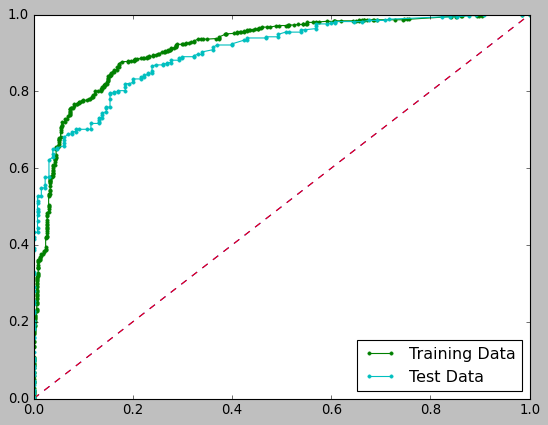

In [1087]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
print('AUC for the Train Data: %.3f' % auc)

### AUC and ROC for the test data
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Tuning for Boosting

In [1097]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
	'n_estimators': [50, 100, 200],
	'learning_rate': [0.01, 0.1, 0.2],
	'max_depth': [3, 5, 7],
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params1 = grid_search.best_params_
best_model1 = grid_search.best_estimator_


best_params1

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [1099]:
# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = model_score(y_test, y_pred_best)

# Print the results
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

TypeError: 'numpy.float64' object is not callable

In [1100]:
## Performance Matrix on train data set
y_train_predict = best_model1.predict(X_train)
model_score = best_model1.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8528584817244611
[[222 110]
 [ 47 688]]
              precision    recall  f1-score   support

       False       0.83      0.67      0.74       332
        True       0.86      0.94      0.90       735

    accuracy                           0.85      1067
   macro avg       0.84      0.80      0.82      1067
weighted avg       0.85      0.85      0.85      1067



<Axes: >

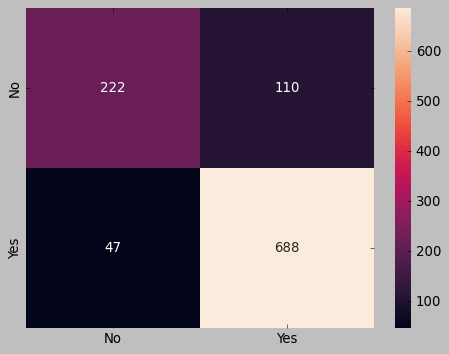

In [1101]:
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1102]:
## Performance Matrix on train data set
y_train_predict = best_model1.predict(X_test)
model_score = best_model1.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8296943231441049
[[ 83  47]
 [ 30 298]]
              precision    recall  f1-score   support

       False       0.73      0.64      0.68       130
        True       0.86      0.91      0.89       328

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.78       458
weighted avg       0.83      0.83      0.83       458



<Axes: >

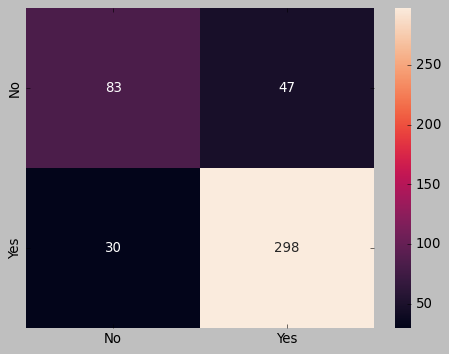

In [1103]:
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC for the Train Data: 0.917
AUC for the Test Data: 0.902


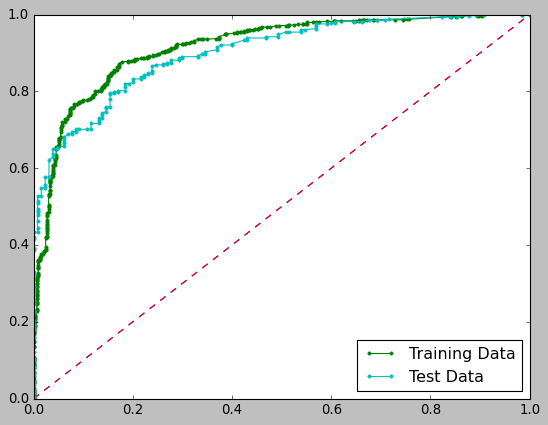

In [1104]:
# predict probabilities
probs = best_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
print('AUC for the Train Data: %.3f' % auc)

### AUC and ROC for the test data
# predict probabilities
probs = best_model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [1095]:
print(pd.__version__)

2.0.3


In [1096]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs           

In [ ]:
pip list


In [ ]:
pip install scikit-learn==1.3.0

Final Model Selection
- Compare all the model built so far - Select the final model with the proper justification - Check the most important features in the final model and draw inferences.


Actionable Insights & Recommendations
- Compare all four models - Conclude with the key takeaways for the business


# Problem no. 2

In [1116]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
a =inaugural.raw('1941-Roosevelt.txt')
b=inaugural.raw('1961-Kennedy.txt')
c=inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## Problem 2 - Define the problem and Perform Exploratory Data Analysis

-Problem Definition - Find the number of Character, words & sentences in all three speeches



In [1117]:
a

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [1118]:
df=pd.read_excel('C:/Users/user/Desktop/PGDSBA/Machine Learning 2/Speeches.xlsx')

In [1119]:
df.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [1120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Speech  3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [1121]:
# average words function

def avgwords(sentence):
    words=sentence.split()
    return (sum(len(word)for word in words)/len(words))

df['Average_words']=df['Speech'].apply(lambda x: avgwords(x))

df.head()

,Name,Speech,Average_words
0,Roosevelt,On each national day of inauguration since 178...,4.783825
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397


In [1137]:


def Lines(content):
    lines=content.split("\n")
    return (sum(len(line)for line in lines))

df['Lines']=df['Speech'].apply(lambda x: Lines(x))

df.head()



,Name,Speech,Average_words,Char_legth,Totalwords,Lines
0,Roosevelt,On each national day of inauguration since 178...,4.783825,7651,1323,7651
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100,7673,1364,7673
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397,10106,1769,10106


In [1123]:
# no. of characters

df['Char_legth']=df['Speech'].str.len()

df.head()

,Name,Speech,Average_words,Char_legth
0,Roosevelt,On each national day of inauguration since 178...,4.783825,7651
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100,7673
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397,10106




# average words function

def sentences(para):
    word=para.split('.')
    return (sum(len(word)for word in words))

df['Sentences']=df['Speech'].apply(lambda x: sentences(x))

df.head()


In [1124]:
## Let's get a word count

df['Totalwords'] = [len(x.split()) for x in df['Speech'].tolist()]
df.head()

,Name,Speech,Average_words,Char_legth,Totalwords
0,Roosevelt,On each national day of inauguration since 178...,4.783825,7651,1323
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100,7673,1364
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397,10106,1769


In [963]:
## count stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Speech','stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


In [964]:
#count of special character
df['hastags'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Speech','hastags']].head()

,Speech,hastags
0,On each national day of inauguration since 178...,0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


In [965]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def sentences(x):
    for i in df['Speech']:
        sentence = i+1
        number_of_sentences = sent_tokenize(sentence)

print(len(number_of_sentences))


68


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Preprocessing


In [969]:
#convert to lower case

df['Speech'] = df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [970]:
## Reove special character
df['Speech']= df['Speech'].str.replace('.'," ").str.replace(','," ").str.replace('\n',' ').str.replace('#',' ').str.replace("[\]"," ").str.replace('[^\w\s]',' ').str.replace('[1-9]',' ')

In [971]:
df['Speech'][1]

'vice president johnson  mr  speaker  mr  chief justice  president eisenhower  vice president nixon  president truman  reverend clergy  fellow citizens  we observe today not a victory of party  but a celebration of freedom -- symbolizing an end  as well as a beginning -- signifying renewal  as well as change  for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago \\n\\nthe world is very different now  for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life  and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state  but from the hand of god \\n\\nwe dare not forget today that we are the heirs of that first revolution  let the word go forth from this time and place  to friend and foe alike  that the torch has been passed to a new g

## Problem 2 - Text cleaning
- Stopword removal - Stemming - find the 3 most common words used in all three speeches


In [982]:
## Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
df.text=df['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [983]:
#Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(["mr"])
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)


df['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson speaker chief justice p...
2    vice president speaker chief justice senator c...
Name: Speech, dtype: object

In [984]:
# Remove all common words

all_words=[i for i in ' '.join(df['Speech']).split()]

words=pd.DataFrame(data=all_words, columns=['words'])



In [985]:
words.value_counts().head(10)

words     
new           26
world         26
america       22
peace         22
nation        21
\n\nwe        16
people        14
freedom       14
\n\nlet       14
government    13
Name: count, dtype: int64

us new and america are the top 3 words used most frequesntly

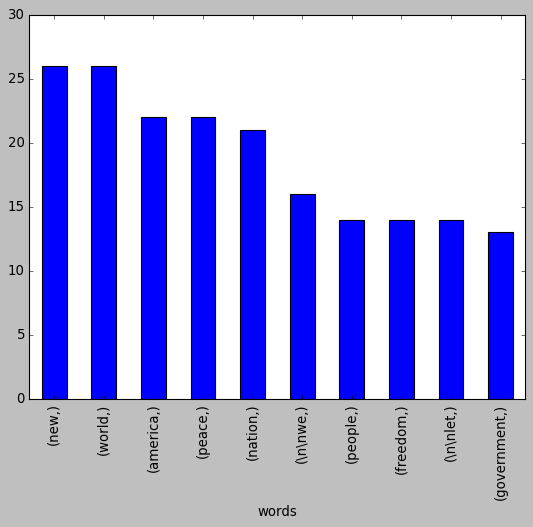

In [986]:
words.value_counts().head(10).plot.bar()
plt.show()

In [980]:
#removal of frequent words

freq =['--','us', 'let','every', 'shall','know','n','nlet','s','nwe']

df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson speaker chief justice p...
2    vice president speaker chief justice senator c...
Name: Speech, dtype: object

In [981]:
all_words=[i for i in ' '.join(df['Speech']).split()]

words=pd.DataFrame(data=all_words, columns=['words'])

words.value_counts().head(40)

words         
new               26
world             26
america           22
peace             22
nation            21
\n\nwe            16
people            14
freedom           14
\n\nlet           14
government        13
years             13
life              12
responsibility    12
history           12
great             11
nations           11
spirit            11
home              10
human             10
time              10
help               9
together           9
faith              9
pledge             9
make               9
role               8
better             8
ask                8
democracy          8
country            8
\n\nin             8
free               8
come               8
sides              8
cannot             7
right              7
\n\nthe            7
progress           7
may                7
war                7
Name: count, dtype: int64

In [987]:
#rare words removal

freq = pd.Series(' '.join(df['Speech']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

misery        1
efforts       1
whatever      1
period        1
joined        1
communists    1
women         1
votes         1
initiative    1
striving      1
Name: count, dtype: int64

## Problem 2 - Plot Word cloud of all three speeches
- Show the most common words used in all three speeches in the form of word clouds


In [934]:
!pip install wordcloud

In [935]:

from wordcloud import WordCloud
wcloud = ' '.join(df['Speech'])
wcloud

'national day inauguration since 1789 people renewed sense dedication united states \\n\\nin washington\\\'s day task people create weld together nation \\n\\nin lincoln\\\'s day task people preserve nation disruption within \\n\\nin day task people save nation institutions disruption without \\n\\nto come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction \\n\\nlives nations determined count years lifetime human spirit life man three-score years ten: little little less life nation fullness measure live \\n\\nthere men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide \\n\\nbut americans true \\n\\neight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively \\n\\nthese later years living years fruitful years people democracy broug

In [936]:
# Removing symbols and punctuations 
df['Speech'] = df['Speech'].str.replace('[\\n\\]',' ')


wcloud=''.join(df['Speech'])
wcloud

'national day inauguration since 1789 people renewed sense dedication united states \\n\\nin washington\\\'s day task people create weld together nation \\n\\nin lincoln\\\'s day task people preserve nation disruption within \\n\\nin day task people save nation institutions disruption without \\n\\nto come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction \\n\\nlives nations determined count years lifetime human spirit life man three-score years ten: little little less life nation fullness measure live \\n\\nthere men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide \\n\\nbut americans true \\n\\neight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively \\n\\nthese later years living years fruitful years people democracy broug

Word Cloud for Speech!


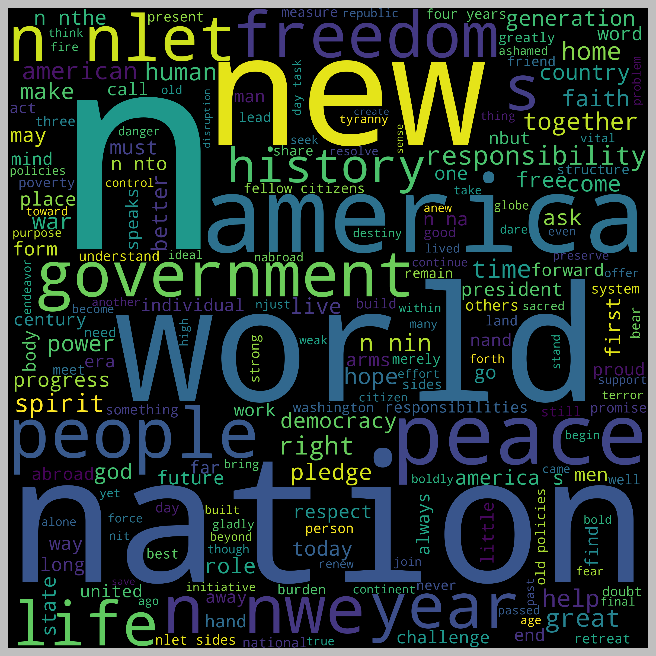

In [937]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wcloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech!")
plt.show()